# Final_Model

# 0.Import Data

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

import imblearn
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

rs=6

In [2]:
path = "../Processed_Data/"
outpath = "../PredictionResult/"

In [3]:
# y
label_risk_company_sample = pd.read_csv("../Data/Online_Data/trainning_data/label_risk_company.csv”)
label_risk_company_sample = label_risk_company_sample.drop_duplicates()

# X
company_ar = pd.read_csv(path+"company_ar_processed.csv")
company_ar_alterstockinfo = pd.read_csv(path+"company_ar_alterstockinfo_processed.csv")
company_ar_assetsinfo = pd.read_csv(path+"company_ar_assetsinfo_processed.csv")
company_ar_nz = pd.read_csv(path+"company_ar_nz_processed.csv")
company_ar_processed = pd.read_csv(path+"company_ar_processed.csv")
company_ar_socialfee = pd.read_csv(path+"company_ar_socialfee_processed.csv")
company_base_info = pd.read_csv(path+"company_base_info_processed.csv")
company_modify = pd.read_csv(path+"company_modify_processed.csv")
el_company_history_inv = pd.read_csv(path+"el_company_history_inv_processed.csv")
el_company_history_manager = pd.read_csv(path+"el_company_history_manager_processed.csv")
tax_abnormal = pd.read_csv(path+"tax_abnormal_processed.csv")
tax_company = pd.read_csv(path+"tax_company_processed.csv")
tax_qianshui = pd.read_csv(path+"tax_qianshui_processed.csv")
tax_year = pd.read_csv(path+"tax_year_processed.csv")


df_list =[company_ar, company_ar_alterstockinfo, company_ar_nz, company_base_info,company_ar_socialfee, \
          company_modify, el_company_history_inv, el_company_history_manager, tax_abnormal, tax_company, \
          tax_qianshui ,tax_year]

## 1. Join Tables

In [4]:
df =label_risk_company_sample
for i in df_list:
    df = pd.merge(df, i , on="entid",how='outer').copy()
df_all = df.copy()
df_all_2 = df.copy()
df = df.dropna(subset=["CaseType"])
df = df.drop(["entid","id"],axis=1)
df.to_csv("df.csv")

df_drop = df.copy()

<AxesSubplot:>

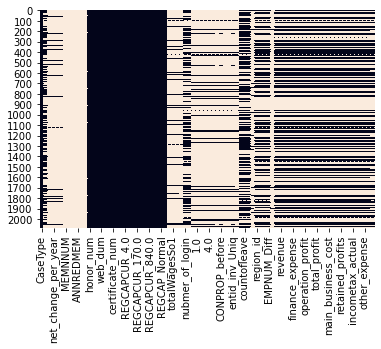

In [5]:
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False)

In [6]:
df = df.fillna(0)
df

,CaseType,women_ratio,Vol/transaction_per_year,net_change_per_year,unique_number_of_SH_involved_per_year,total_transaction_number_per_year,MEMNNUM,FARNUM,ANNNEWMEM,ANNREDMEM,...,other_operating_cost,retained_profits,gross_profit,main_business_gross,incometax_actual,profit_margin,operating_profit_margin,other_expense,net_asset,main_biz_profit_margin
0,3.0,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,3.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.681896,0.861137,0.0,0.0,-0.151294,-2.365160,-1.023133,1.867823,-0.575773,2.477843
2,0.0,0.444444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,3.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.444446,0.134651,0.0,0.0,-0.430861,0.879706,-0.223222,-0.689344,-0.347430,-1.121208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2080,3.0,0.545455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2081,3.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2082,3.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2083,3.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.110127,0.243137,0.0,0.0,0.023342,0.206735,0.273269,0.734497,0.734650,0.268797


# 2. Split Dataset

In [7]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

RANDOM_STATE = 6

In [8]:
X = df.drop(["CaseType"],axis=1)
y = df["CaseType"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs,stratify=y) 

# 3. Model

## 3.1.Base

In [13]:
xgb = XGBClassifier(random_state=rs,verbosity = 0,estimators=100, max_depth=10, learning_rate=1)
xgb.fit(X_train,y_train)
print(classification_report(y_test, xgb.predict(X_test)))

C:\Users\gamis\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


              precision    recall  f1-score   support

         0.0       0.38      0.45      0.42        11
         1.0       0.33      0.09      0.14        11
         2.0       1.00      0.65      0.79        20
         3.0       0.95      0.98      0.96       375

    accuracy                           0.93       417
   macro avg       0.67      0.54      0.58       417
weighted avg       0.92      0.93      0.92       417



In [15]:
act_test= pd.read_csv("../Data/Online_Data/test_data/test_data.csvtest_data.csv")

ind = X_train.columns.values.tolist()
ind.append("entid")

for i in df_list:
    act_test = pd.merge(act_test, i , on="entid",how='left').copy()
act_test = act_test[ind]

ent = act_test["entid"]

act_test_X = act_test.drop(["entid"],axis=1)
act_test_X = act_test_X.fillna(0)

df_out = pd.DataFrame()
df_out["entid"] = ent
df_out["predict"] = xgb.predict(act_test_X)

#df_out.to_csv(outpath+"df_out_1.csv",index=False)

## 3.2.Semi Supervised for Base

In [16]:
df_all = df_all.iloc[len(df_all[df_all["CaseType"]>-1]):,:]
df_add = df_all.drop(["CaseType","id","entid"],axis=1)
df_add = df_add.fillna(0)
df_add

,women_ratio,Vol/transaction_per_year,net_change_per_year,unique_number_of_SH_involved_per_year,total_transaction_number_per_year,MEMNNUM,FARNUM,ANNNEWMEM,ANNREDMEM,concentration(ESG),...,other_operating_cost,retained_profits,gross_profit,main_business_gross,incometax_actual,profit_margin,operating_profit_margin,other_expense,net_asset,main_biz_profit_margin
2085,0.457746,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.274038,-7.253495e+05,3.296052e+06,3.296052e+06,-0.092693,-0.029356,-0.030853,6.688114e+06,2.118802e+07,3.180760e+07
2086,0.000000,0.0,0.000000,0.0,0.0,5.0,7.0,0.0,9.0,1.0,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
2087,0.500000,243165.0,0.621989,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,870000.177025,-3.133073e+06,2.685150e+07,2.387000e+07,-0.666003,-0.296341,-0.342939,2.374930e+07,7.634000e+08,1.960067e+07
2088,0.809524,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.030642,-1.463999e+04,0.000000e+00,0.000000e+00,-0.118862,29089.227030,29087.308515,2.863983e+04,3.195016e+04,2.752229e+00
2089,0.588235,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.454968,-4.633384e+04,0.000000e+00,0.000000e+00,0.404115,336110.971449,336114.067484,1.408145e+05,8.552473e+07,1.781334e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12303,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.787543,-1.828851e+00,0.000000e+00,0.000000e+00,-0.566075,-0.049365,0.896717,-1.340319e+00,-4.240097e-01,-1.619164e+00
12304,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
12305,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
12306,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00


In [17]:
pred = xgb.predict(df_add)
df_add["CaseType"] = pred
df_add = df_add[df_add["CaseType"]!=3]
pred_exc3 = df_add["CaseType"]

In [18]:
df_add = df_add.drop(["CaseType"],axis=1)
df_add

,women_ratio,Vol/transaction_per_year,net_change_per_year,unique_number_of_SH_involved_per_year,total_transaction_number_per_year,MEMNNUM,FARNUM,ANNNEWMEM,ANNREDMEM,concentration(ESG),...,other_operating_cost,retained_profits,gross_profit,main_business_gross,incometax_actual,profit_margin,operating_profit_margin,other_expense,net_asset,main_biz_profit_margin
2093,0.552941,703531.0,1.930562,1.0,1.5,0.0,0.0,0.0,0.0,0.0,...,-1.117522,-2.507856e+06,4.912001e+06,4.912000e+06,658804.712534,0.000194,5.857556e-03,6.356381e+06,7.580067e+10,4.213149e+06
2098,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.174454,-1.329334e+04,7.366323e+04,7.366356e+04,1.229492,-0.058699,-5.869963e-02,2.134356e+05,7.254557e+05,3.742660e+05
2139,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.974204,-3.895536e-03,0.000000e+00,0.000000e+00,2.487024,-0.000976,-2.082122e-04,1.132695e+00,1.983649e+05,1.131650e+01
2147,0.783784,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.180429,-4.333846e+02,3.308919e+05,3.308911e+05,0.984256,-0.001766,-3.628083e-03,4.301330e+05,6.666603e+04,2.453692e+05
2148,0.459459,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.198247,3.939701e+05,1.200921e+06,0.000000e+00,13930.336316,0.221560,1.818068e-07,2.005972e-01,9.749052e-01,1.841667e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12204,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
12209,0.666667,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
12211,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.688894,-4.085149e-01,0.000000e+00,0.000000e+00,0.909287,2.962914,-4.296644e+00,-9.505243e-01,4.999990e+05,-4.158605e+00
12242,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [19]:
X_train = pd.concat([X_train,df_add]).copy()
y_train = pd.concat([pd.DataFrame(y_train),pd.DataFrame(pred_exc3,columns=["CaseType"])]).copy()

In [20]:
xgb.fit(X_train,y_train)

C:\Users\gamis\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\gamis\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, estimators=100, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=6, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0)

In [21]:
print(classification_report(y_test, xgb.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.33      0.45      0.38        11
         1.0       0.20      0.09      0.13        11
         2.0       0.80      0.60      0.69        20
         3.0       0.94      0.96      0.95       375

    accuracy                           0.91       417
   macro avg       0.57      0.53      0.54       417
weighted avg       0.90      0.91      0.90       417



In [22]:
act_test= pd.read_csv("../Data/Online_Data/test_data/test_data.csvtest_data.csv")

ind = X_train.columns.values.tolist()
ind.append("entid")

for i in df_list:
    act_test = pd.merge(act_test, i , on="entid",how='left').copy()
act_test = act_test[ind]

ent = act_test["entid"]

act_test_X = act_test.drop(["entid"],axis=1)
act_test_X = act_test_X.fillna(0)

df_out = pd.DataFrame()
df_out["entid"] = ent
df_out["predict"] = xgb.predict(act_test_X)

#df_out.to_csv(outpath+"df_out_1-1.csv",index=False)

## 3.3.Drop Column

In [23]:
df_drop

,CaseType,women_ratio,Vol/transaction_per_year,net_change_per_year,unique_number_of_SH_involved_per_year,total_transaction_number_per_year,MEMNNUM,FARNUM,ANNNEWMEM,ANNREDMEM,...,other_operating_cost,retained_profits,gross_profit,main_business_gross,incometax_actual,profit_margin,operating_profit_margin,other_expense,net_asset,main_biz_profit_margin
0,3.0,0.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.681896,0.861137,0.0,0.0,-0.151294,-2.365160,-1.023133,1.867823,-0.575773,2.477843
2,0.0,0.444444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.444446,0.134651,0.0,0.0,-0.430861,0.879706,-0.223222,-0.689344,-0.347430,-1.121208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2080,3.0,0.545455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2081,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2082,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2083,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.110127,0.243137,0.0,0.0,0.023342,0.206735,0.273269,0.734497,0.734650,0.268797


In [24]:
drop_col = []
(len(df_drop)-df_drop.isnull().sum().values)/len(df_drop)

for i in range(len((len(df_drop)-df_drop.isnull().sum().values)/len(df_drop))):
#    if ((len(df_drop)-df_drop.isnull().sum().values)/len(df_drop))[i] < 0.8:
    if ((len(df_drop)-df_drop.isnull().sum().values)/len(df_drop))[i] < 0.5:
        drop_col.append(df_drop.columns[i])
#drop_col

df_drop = df_drop.drop(drop_col,axis=1)
df_drop = df_drop.fillna(0)


In [25]:
X = df.drop(["CaseType"],axis=1)
y = df_drop["CaseType"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs,stratify=y) 

In [26]:
xgb = XGBClassifier(random_state=rs,verbosity = 0)
xgb.fit(X_train,y_train)

C:\Users\gamis\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=6, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0)

In [27]:
print(classification_report(y_test, xgb.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.40      0.36      0.38        11
         1.0       0.50      0.09      0.15        11
         2.0       1.00      0.60      0.75        20
         3.0       0.94      0.99      0.96       375

    accuracy                           0.93       417
   macro avg       0.71      0.51      0.56       417
weighted avg       0.92      0.93      0.92       417



In [28]:
act_test= pd.read_csv("../Data/Online_Data/test_data/test_data.csvtest_data.csv")

ind = X_train.columns.values.tolist()
ind.append("entid")

for i in df_list:
    act_test = pd.merge(act_test, i , on="entid",how='left').copy()
act_test = act_test[ind]

ent = act_test["entid"]

act_test_X = act_test.drop(["entid"],axis=1)
act_test_X = act_test_X.fillna(0)

df_out = pd.DataFrame()
df_out["entid"] = ent
df_out["predict"] = xgb.predict(act_test_X)

#df_out.to_csv(output_path+"df_out_2.csv",index=False)

## 3.4.SMOTE

In [29]:
oversample = SMOTE(random_state=rs)
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [30]:
xgb = XGBClassifier(random_state=rs,verbosity = 0, estimators = 150, max_depth = 15 ,learning_rate = 1)
xgb.fit(X_train,y_train)
print(classification_report(y_test, xgb.predict(X_test)))

C:\Users\gamis\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


              precision    recall  f1-score   support

         0.0       0.29      0.45      0.36        11
         1.0       0.50      0.36      0.42        11
         2.0       0.41      0.60      0.49        20
         3.0       0.96      0.93      0.94       375

    accuracy                           0.88       417
   macro avg       0.54      0.59      0.55       417
weighted avg       0.90      0.88      0.89       417



In [31]:
act_test= pd.read_csv("../Data/Online_Data/test_data/test_data.csvtest_data.csv")

ind = X_train.columns.values.tolist()
ind.append("entid")

for i in df_list:
    act_test = pd.merge(act_test, i , on="entid",how='left').copy()
act_test = act_test[ind]

ent = act_test["entid"]

act_test_X = act_test.drop(["entid"],axis=1)
act_test_X = act_test_X.fillna(0)

df_out = pd.DataFrame()
df_out["entid"] = ent
df_out["predict"] = xgb.predict(act_test_X)

#df_out.to_csv(output_path+"df_out_3.csv",index=False)

## 3.5.Hyper Parameter Tuning

In [32]:
# build pipeline
sscaler = StandardScaler()
xgb = XGBClassifier(random_state=rs,verbosity = 0)

pipe_xgb = make_pipeline(sscaler, xgb)
pipe_xgb

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, gamma=None, gpu_id=None,
                               importance_type='gain',
                               interaction_constraints=None, learning_rate=None,
                               max_delta_step=None, max_depth=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=6, reg_alpha=None, reg_lambda=None,
                               scale_pos_weight=None, subsample=None,
                               tree_method=None, validate_parameters=None,
                               verbosity=0))])

In [ ]:
# set parameters for GridSearch tunning
xgb_params = {
    'xgbclassifier__n_estimators':[100,150],
    'xgbclassifier__learning_rate': [0.001, 0.01, 1],
    'xgbclassifier__max_depth':[5,10,15]
}

grid = RandomizedSearchCV(pipe_xgb, xgb_params, scoring='f1_macro')
grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_score_)

C:\Users\gamis\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\gamis\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\gamis\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

C:\Users\gamis\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\gamis\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\gamis\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

C:\Users\gamis\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\gamis\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\gamis\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

In [ ]:
y_pred = grid.best_estimator_.predict(X_test)
y_pred_prob = grid.predict_proba(X_test)

print('f1_score', f1_score(y_test, y_pred, average='weighted'))
print('roc_auc_score', roc_auc_score(y_test, y_pred_prob, multi_class='ovr'))
print(classification_report(y_test, y_pred))

In [ ]:
act_test= pd.read_csv("../Data/Online_Data/test_data/test_data.csvtest_data.csv")

ind = X_train.columns.values.tolist()
ind.append("entid")

for i in df_list:
    act_test = pd.merge(act_test, i , on="entid",how='left').copy()
act_test = act_test[ind]

ent = act_test["entid"]

act_test_X = act_test.drop(["entid"],axis=1)
act_test_X = act_test_X.fillna(0)

df_out = pd.DataFrame()
df_out["entid"] = ent
df_out["CaseType"] = grid.predict(act_test_X)

df_out.to_csv(output_path + "result.csv",index=False)